# Fit data with simple lags

Mean Squared Error for Random forest Model is: 4114671.328455851
Mean Squared Error for Linear regression Model is: 4532730.669630279


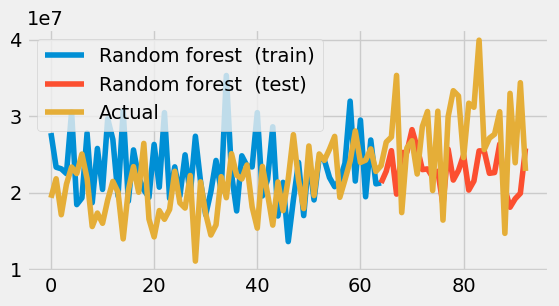

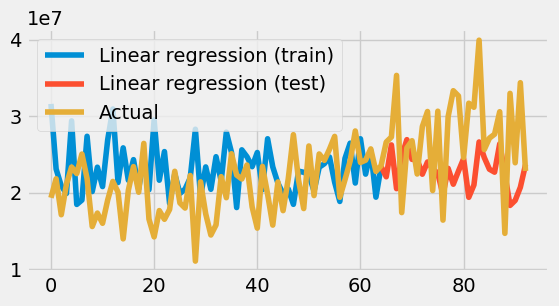

In [2]:
from timeseries_basic import createTimeSeriesDf, insertLags, prepareTrainData, trainAndFit, plotPredAndTest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

# prepare data
df = createTimeSeriesDf('C:/Users/janyl/safemed_2.xlsx', make_date_buckets=True)
colsSelected = insertLags(df)
X_train, X_test, y_train, y_test = prepareTrainData(df, colsSelected + ["quarter", "month"])
actualSales = df["Sales"].to_numpy()

# predict
modelRf = RandomForestRegressor(n_estimators=100, max_features=3, random_state=1)
fitRf, predRf = trainAndFit(modelRf, X_train, X_test, y_train, y_test, "Random forest")
plt.figure()
plotPredAndTest(fitRf, predRf, actualSales, label= "Random forest ")

modelLin=LinearRegression()
fitLin, predLin = trainAndFit(modelLin, X_train, X_test, y_train, y_test, "Linear regression")
plt.figure()
plotPredAndTest(fitLin, predLin, actualSales, label= "Linear regression")
